In [1]:
import os 
import torch
from torch import nn,optim
import torch.nn.functional as F

import numpy as np
import cv2

from model.Teawater.Teawater_v6 import Teawater_v6
from dataset.Fetus import FetusDataset
from torchvision.transforms import transforms
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

In [2]:
path='E:\\Idm_Downloads\\Compressed\\Data\\data\\test'
#变换
x_transforms = transforms.Compose([
    transforms.Resize((512,512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
# mask只需要转换为tensor
y_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    # transforms.CenterCrop(512),
    transforms.ToTensor()
   ])
test_dataset=FetusDataset(path,mode='train',transform=x_transforms,target_transform=y_transforms)
test_dataloader=DataLoader(test_dataset,batch_size=5,shuffle=True)

In [3]:
model=Teawater_v6(1,2)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(),lr=5e-5)


In [4]:
model.load_state_dict(torch.load('F:/checkpoints/train_7m_Teawater_v6_5e5_change_67.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

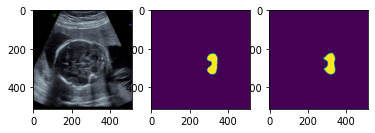

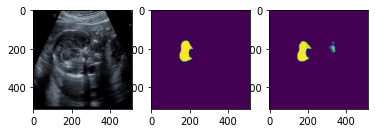

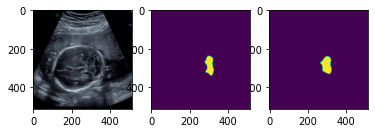

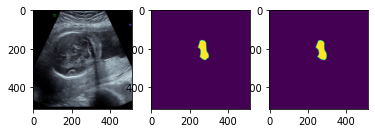

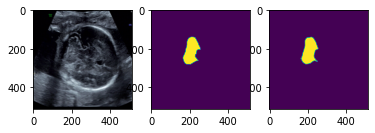

In [5]:
imgs,labels,_=next(iter(test_dataloader))
imgs_y=model(imgs)
imgs_y=nn.Sigmoid()(imgs_y)
for i in range(len(imgs)):
    img,label,img_y=imgs[i],labels[i],imgs_y[i]
    img_=img.squeeze().permute(1,2,0).numpy()
    #print(img_.shape)
    plt.figure(i)
    plt.subplot(131)
    plt.imshow(img_)
    img_ys=img_y.squeeze().detach().numpy()
    plt.subplot(133)
    plt.imshow(img_ys)
    label_=label.squeeze().numpy()
    plt.subplot(132)
    plt.imshow(label_)
plt.show()